In [1]:
import signal
import json
from mflib.mf_timestamp import mf_timestamp
from fabrictestbed_extensions.fablib.fablib import FablibManager as fablib_manager
from ipaddress import ip_address, IPv4Address, IPv4Network
import matplotlib.pyplot as plt
import schedule
import time
import pandas as pd
import datetime

fablib = fablib_manager()
slice_name="file-project_" + fablib.get_bastion_username()

container_name="timestamp"
ts = mf_timestamp(slice_name=slice_name, container_name=container_name)
packet_test_name = "packet_test"
event_test_name= "event_test"


try:
    slice = fablib.get_slice(name=slice_name)
except Exception as e:
    print(f"Fail: {e}")
hotServer = slice.get_node(name="hotServer")

task start
Fail: Node not found: -----------------  ------------------------------------------------------------------------------------------------------------------------------------------
ID                 81ae65c8-3a53-4c82-93e3-de3d0ba8e0b5
Name               hotServer
Cores              2
RAM                4
Disk               100
Image              default_ubuntu_22
Image Type         qcow2
Host               mass-w3.fabric-testbed.net
Site               MASS
Management IP      2001:48e8:6401:3:f816:3eff:fecd:c588
Reservation State  Active
Error Message
SSH Command        ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:48e8:6401:3:f816:3eff:fecd:c588
-----------------  ------------------------------------------------------------------------------------------------------------------------------------------
The docker command is: sudo docker exec -i timestamp python3 /root/services/timestamp/service_files/timestamptool.p

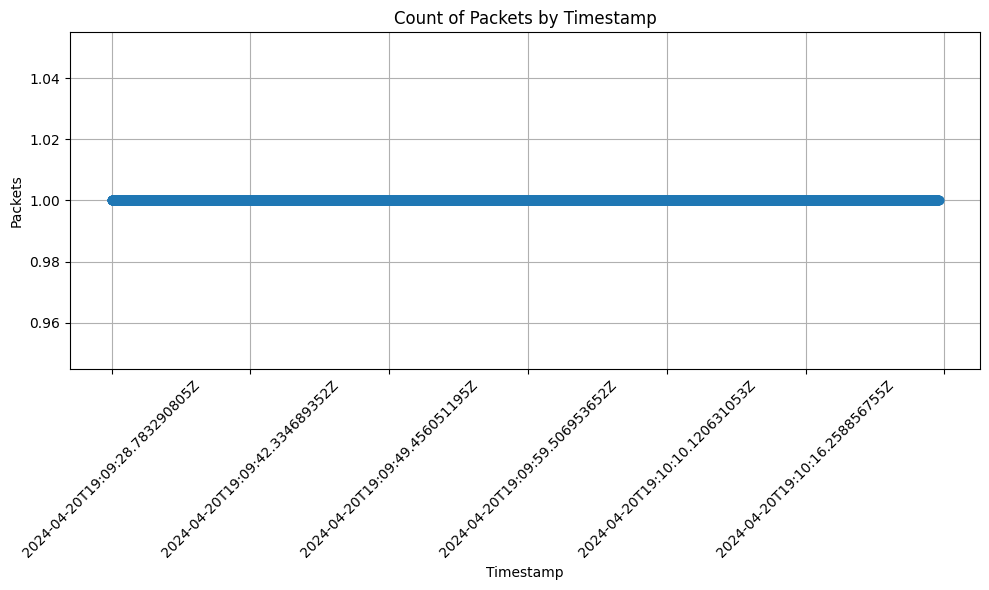

task start
Fail: Node not found: -----------------  ------------------------------------------------------------------------------------------------------------------------------------------
ID                 81ae65c8-3a53-4c82-93e3-de3d0ba8e0b5
Name               hotServer
Cores              2
RAM                4
Disk               100
Image              default_ubuntu_22
Image Type         qcow2
Host               mass-w3.fabric-testbed.net
Site               MASS
Management IP      2001:48e8:6401:3:f816:3eff:fecd:c588
Reservation State  Active
Error Message
SSH Command        ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:48e8:6401:3:f816:3eff:fecd:c588
-----------------  ------------------------------------------------------------------------------------------------------------------------------------------
The docker command is: sudo docker exec -i timestamp python3 /root/services/timestamp/service_files/timestamptool.p

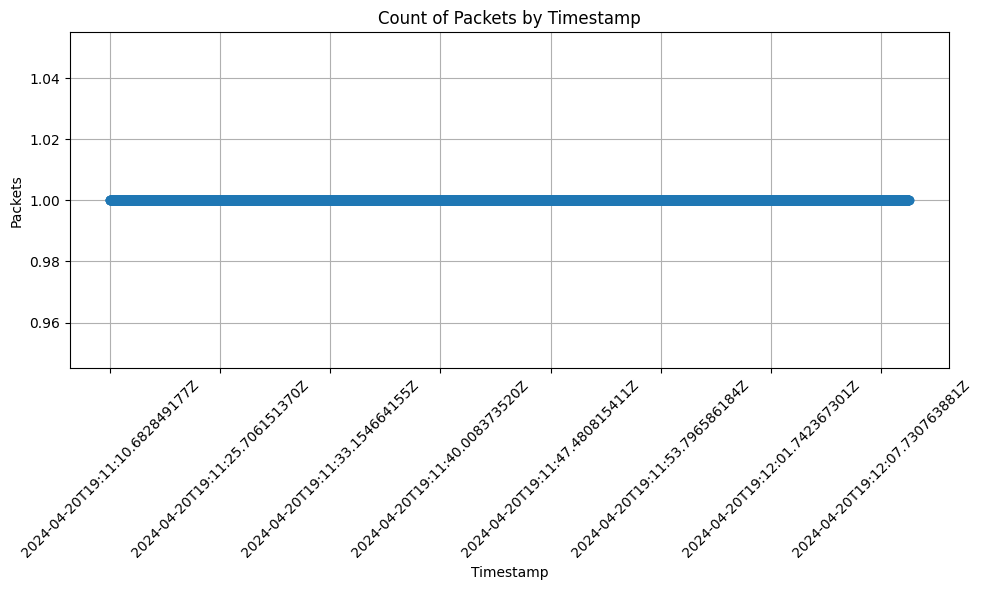

task start
Stopping all tasks and exiting...
Fail: Node not found: -----------------  ------------------------------------------------------------------------------------------------------------------------------------------
ID                 81ae65c8-3a53-4c82-93e3-de3d0ba8e0b5
Name               hotServer
Cores              2
RAM                4
Disk               100
Image              default_ubuntu_22
Image Type         qcow2
Host               mass-w3.fabric-testbed.net
Site               MASS
Management IP      2001:48e8:6401:3:f816:3eff:fecd:c588
Reservation State  Active
Error Message
SSH Command        ssh -i /home/fabric/work/fabric_config/slice_key -F /home/fabric/work/fabric_config/ssh_config ubuntu@2001:48e8:6401:3:f816:3eff:fecd:c588
-----------------  ------------------------------------------------------------------------------------------------------------------------------------------
The docker command is: sudo docker exec -i timestamp python3 /root/services/times

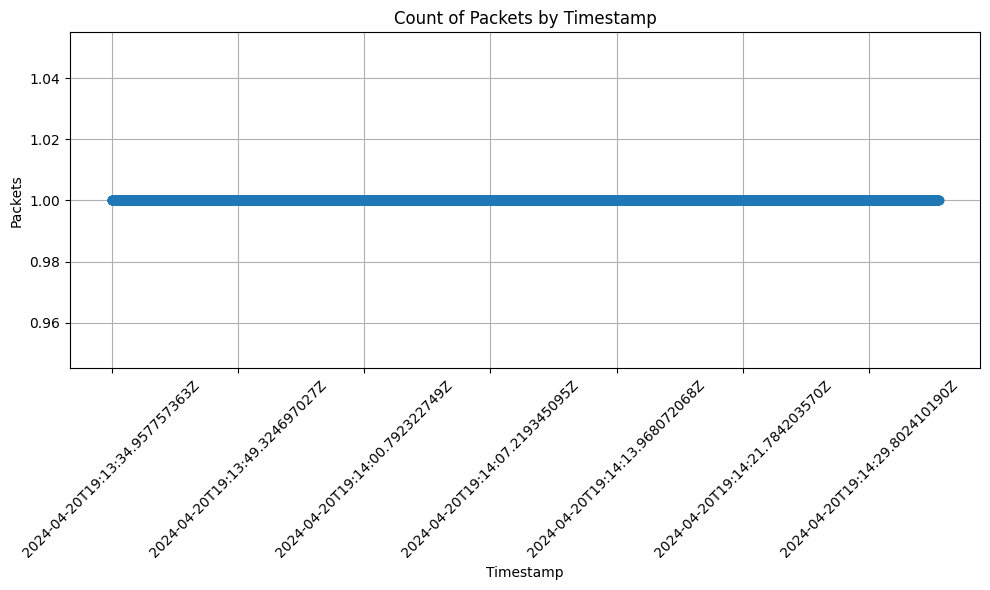

Stopping all tasks and exiting...


NameError: name 'sys' is not defined

In [5]:
def run_task():
    print("task start")
    # record
    ts.record_packet_timestamp(node=hotServer,name=packet_test_name, interface="enp7s0" ,ipversion="4",
                           protocol="tcp", duration="60", verbose=True)
    # download
    timestamp_volume= "/home/rocky/services/timestamp/output"
    # Specify your Jupyterhub download path
    file_download_path="/home/fabric/work/final_project/hot_server_data/hotServer_" + datetime.datetime.now().strftime("%Y-%m-%d_%H%M%S") + ".json"
    file_content = ts.download_timestamp_file(node="hotServer", data_type="packet_timestamp",
                               local_file=file_download_path,
                               bind_mount_volume=timestamp_volume)
    # Find threshhold
    with open(file_download_path, 'r') as f:
        result = json.load(f)
    df = pd.DataFrame.from_dict(result)
    df["timestamp"] = pd.to_datetime(df.timestamp).dt.round('1s')

    # Print
    plt.figure(figsize=(10, 6))
    count_by_timestamp = df.groupby('timestamp').size()
    count_by_timestamp.plot(kind='line', marker='o')
    plt.title('Count of Packets by Timestamp')
    plt.xlabel('Timestamp')
    plt.ylabel('Packets')
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

schedule.every(30).seconds.do(run_task)
run_task()
# Define a signal handler to stop the scheduler
def signal_handler(sig, frame):
    print("Stopping all tasks and exiting...")
    schedule.clear()
    sys.exit(0)

# Bind the signal handler to the interrupt signal (Ctrl+C)
signal.signal(signal.SIGINT, signal_handler)
while True:
    schedule.run_pending()
    time.sleep(1)

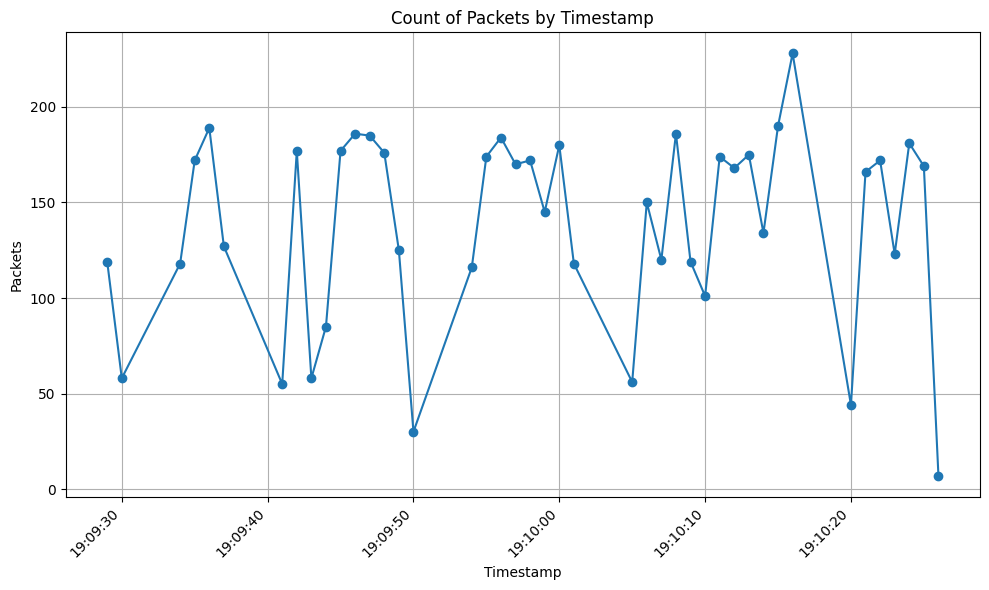

In [7]:
with open("/home/fabric/work/final_project/hot_server_data/hotServer_2024-04-20_191030.json", 'r') as f:
    result = json.load(f)
df = pd.DataFrame.from_dict(result)
df["timestamp"] = pd.to_datetime(df.timestamp).dt.round('1s')

# Print
plt.figure(figsize=(10, 6))
count_by_timestamp = df.groupby('timestamp').size()
count_by_timestamp.plot(kind='line', marker='o')
plt.title('Count of Packets by Timestamp')
plt.xlabel('Timestamp')
plt.ylabel('Packets')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()